# Assignment 1
Pertemuan - 2 Data Visualisasi
<br>
Lakukan Visualisasi menggunakan datasets `titanic.csv` untuk menganalisa informasi 
* Single Variable
* Two Variable
* Multi Variable

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

## Data Loading

In [59]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [62]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Data Preparation

### Rename Column

In [64]:
df.columns = df.columns.str.lower()

### Drop Columns

In [65]:
df.drop(['passengerid','cabin'], axis=1, inplace=True)

### Handling Missing Value

In [66]:
df['age'] = df['age'].fillna(df['age'].mean()).astype('int64')

In [67]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    int64  
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


## Data Visualization

### Split data

In [69]:
numeric_columns = ['survived','pclass','age','sibsp','parch','fare']
categoric_columns = ['sex','embarked']

### Single Variable (Distribution)
Visualisasi untuk Melihat Distribusi *single data* dari attribut

#### Numeric Variable

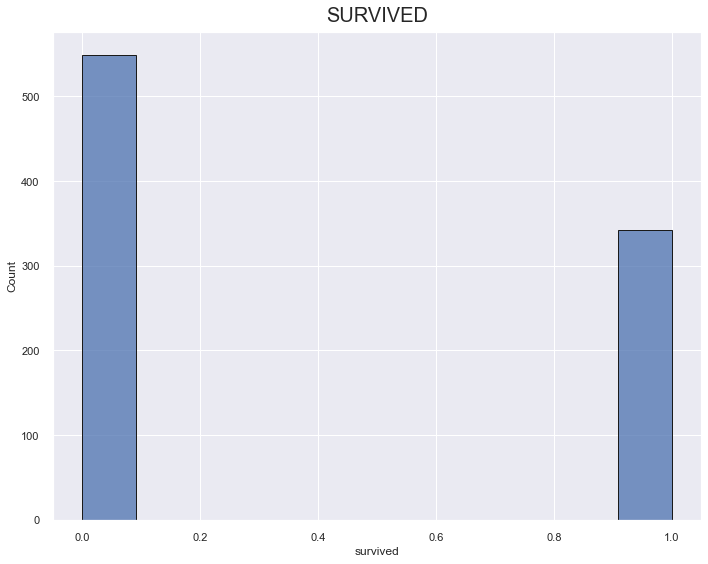

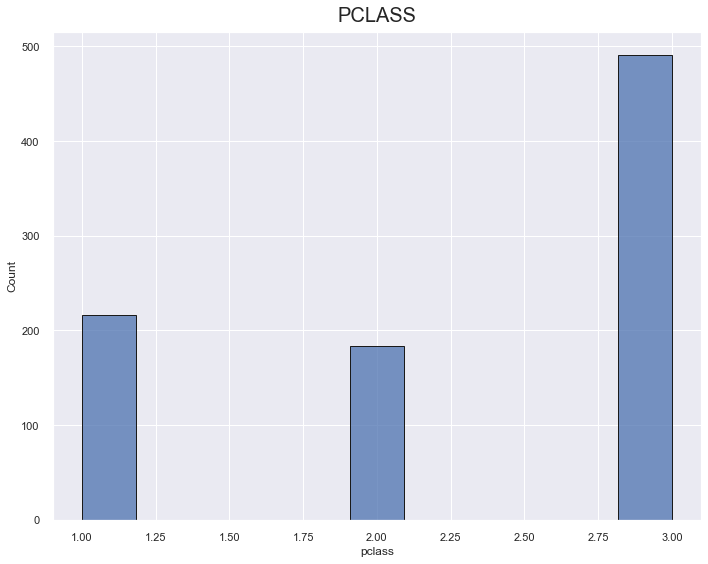

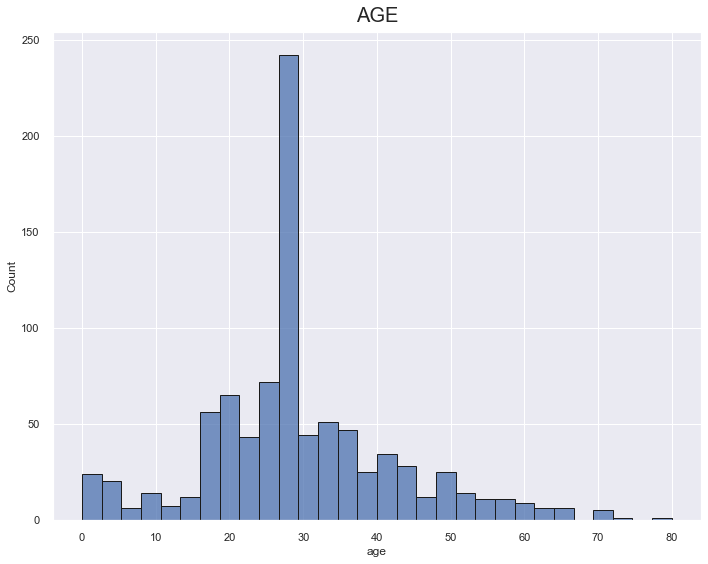

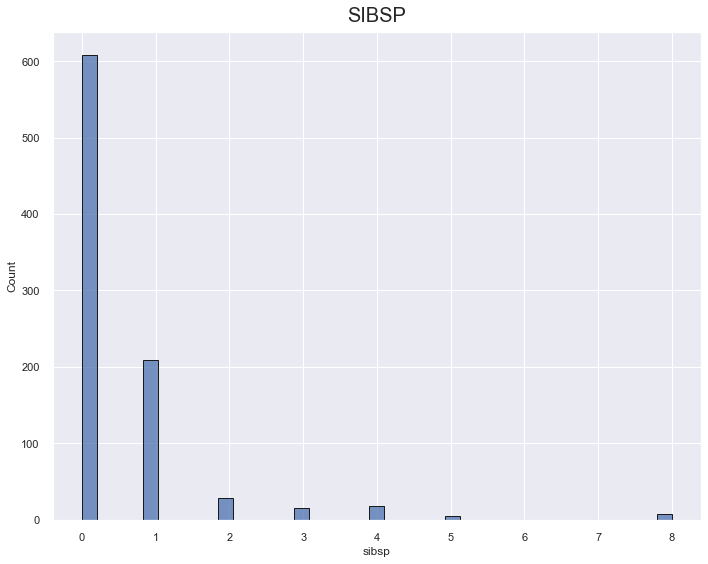

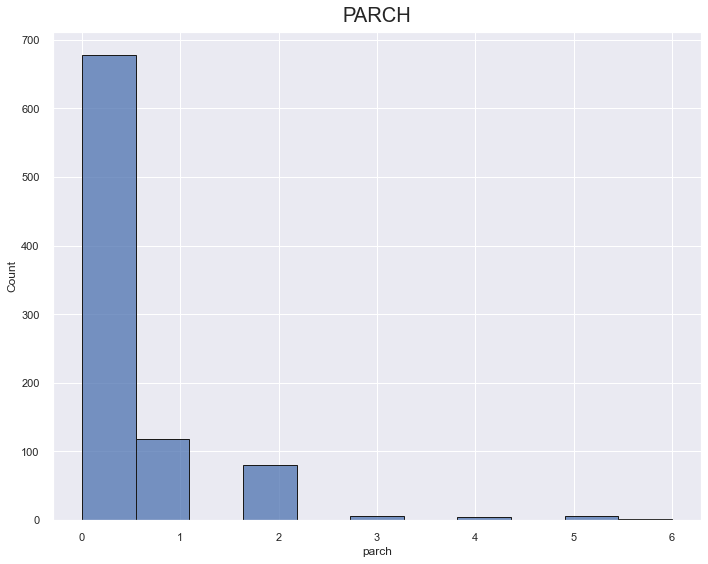

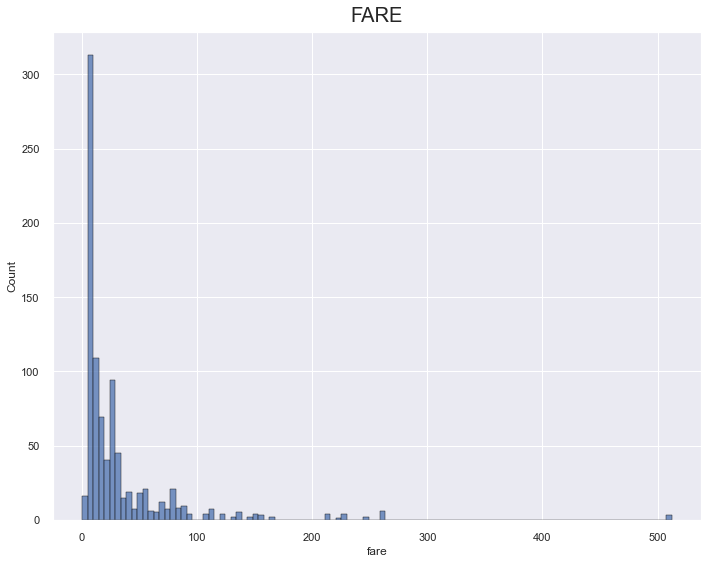

In [70]:
for column in numeric_columns:
    sns.set(rc={"figure.figsize":(10,8)})
    sns.histplot(data=df[column], edgecolor='k')
    plt.title(column.upper(), fontsize=20, pad=10)
    plt.tight_layout()
    plt.show()

#### Categoric Variable

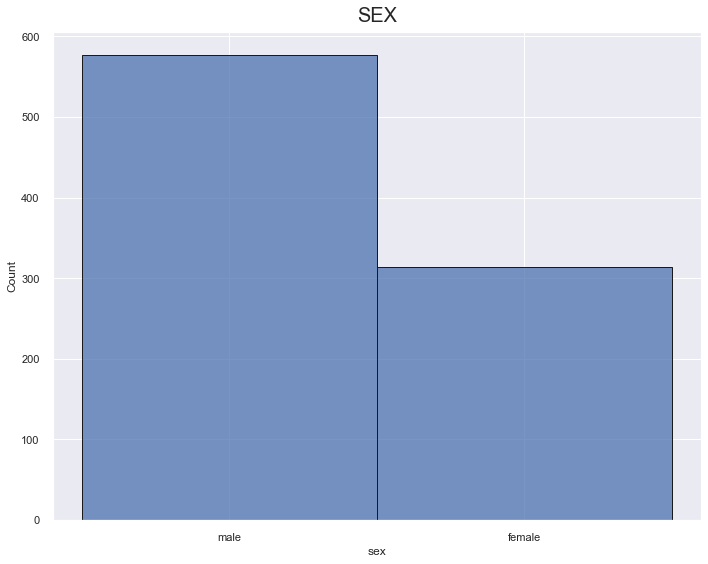

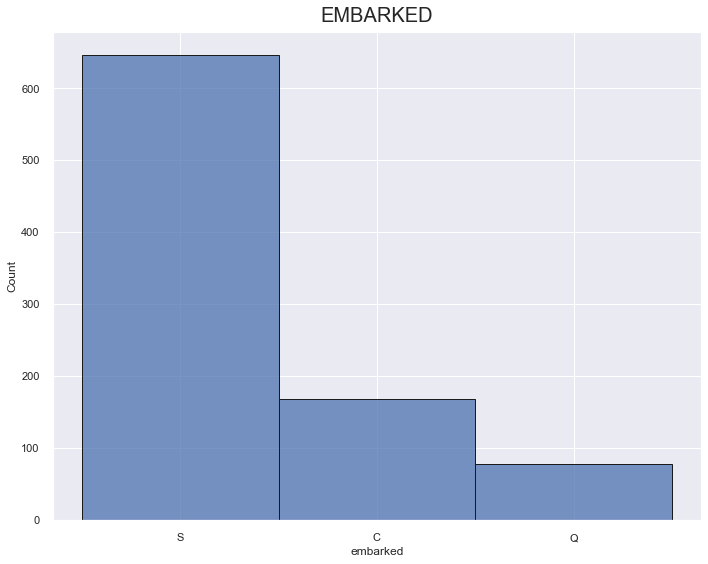

In [71]:
for column in categoric_columns:
    sns.set(rc={"figure.figsize":(10, 8)})
    sns.histplot(data=df[column], edgecolor='k')
    plt.title(column.upper(), fontsize=20, pad=10)
    plt.tight_layout()
    plt.show()

### Two Variable
Visualisasi untuk melihat data berdasarkan label

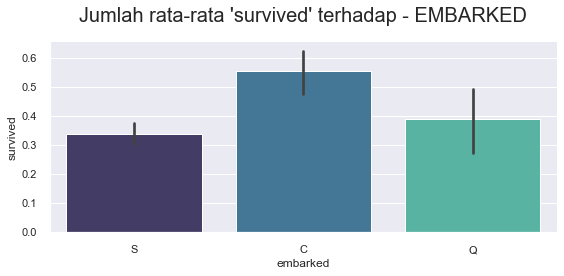

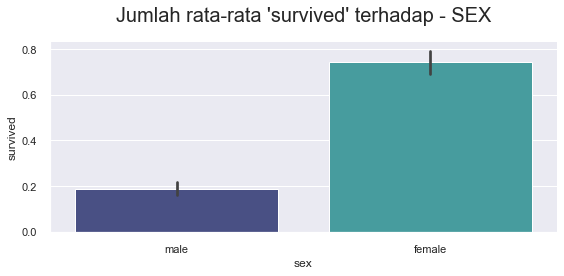

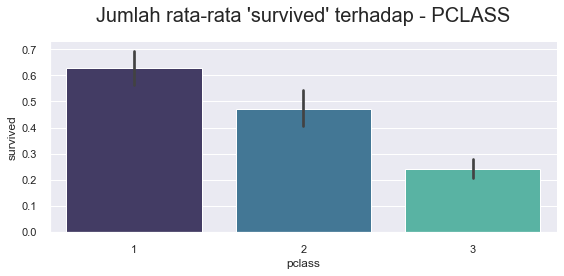

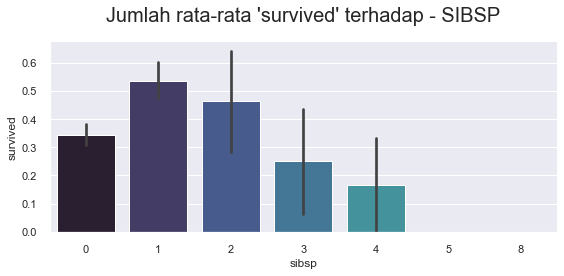

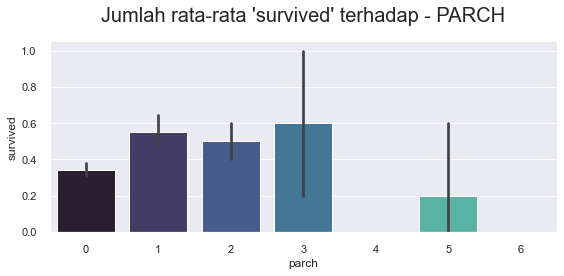

In [72]:
cat_columns = ['embarked','sex','pclass','sibsp', 'parch']
for column in cat_columns:
    sns.catplot(x=column, y='survived', kind="bar", dodge=False, height = 4, aspect = 2,  data=df, palette="mako")
    plt.title(f"Jumlah rata-rata 'survived' terhadap - {column.upper()}", size=20, pad=20)
    plt.tight_layout()
    plt.show()

### Multi Variable
Visualisasi untuk melihat korelasi antar feature

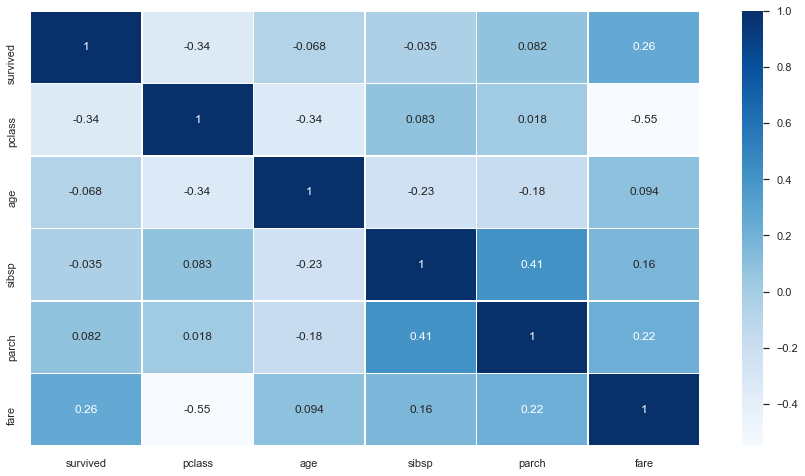

In [106]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,linewidths=.5,cmap="Blues")
plt.show()

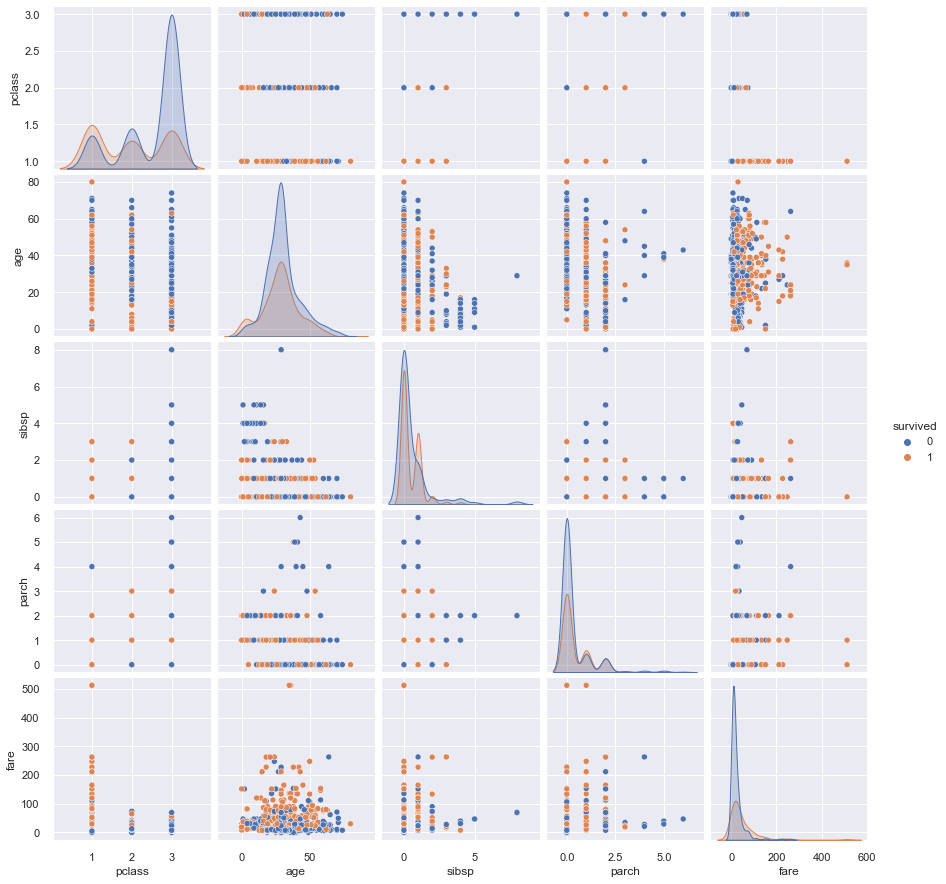

In [74]:
sns.pairplot(df, hue='survived')
plt.show()

## Check Outlier

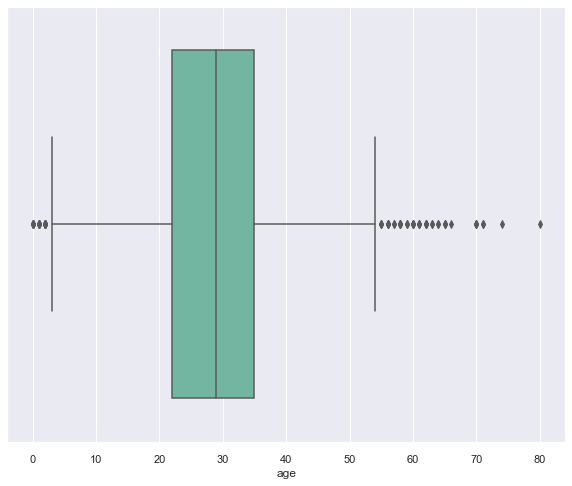

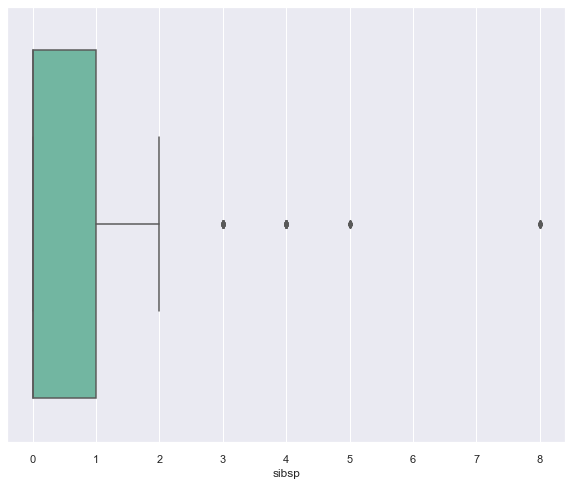

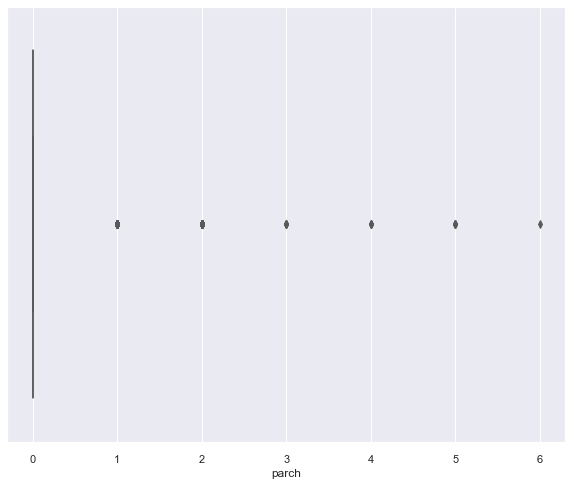

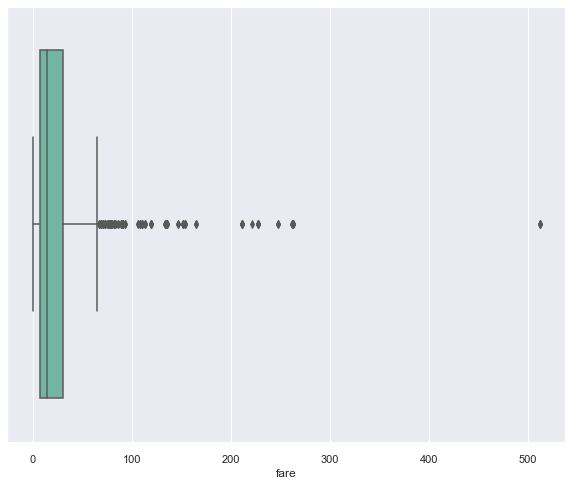

In [88]:
col = ['age', 'sibsp', 'parch', 'fare']
for i in col :
    sns.boxplot(data = df,x = i,palette="Set2")
    plt.show()